# Modelisation de la consommation totale d'energie

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.preprocessing as sk_prepro
from sklearn import metrics

In [28]:
df = pd.read_csv('data_full.csv')

In [29]:
data_num = df
target_tag = 'TotalGHGEmissions'
target = data_num[target_tag]
data_num = data_num.drop(labels = [target_tag,'SiteEnergyUse(kBtu)', 'ENERGYSTARScore','SiteEUI(kBtu/sf)'], axis = 1)

In [31]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Columns: 573 entries, 0 to ThirdLargestPropertyUseTypeGFA
dtypes: float64(573)
memory usage: 7.1 MB


## Modèle linéaire

In [32]:
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

In [33]:
from sklearn import linear_model
line_reg = linear_model.LinearRegression()

In [34]:
#first let's test this on knregressoe
xtrain, xtest, ytrain, ytest = train_test_split(data_num, target, test_size = 0.2)

#let's standard scale

sscaler = sk_prepro.StandardScaler()
sscaler_fit = sscaler.fit(xtrain)
xtrain = sscaler_fit.transform(xtrain)
xtest = sscaler_fit.transform(xtest)

#log scale the target
ytrain = np.log(ytrain)
ytest = np.log(ytest)



In [44]:
def true_pred_plot(y_train,pred_train, y_test, pred_test):
    fig, ax = plt.subplots(2, figsize = (10,10))
    
    line_reg_train = line_reg.fit(np.array(pred_train).reshape(-1,1),y_train)
    r2_train = line_reg_train.score(np.array(pred_train).reshape(-1,1),y_train)
    rmse_train = (np.sqrt(metrics.mean_squared_error(y_train, pred_train))/np.mean(ytrain))
    a = float(line_reg_train.coef_)
    b= line_reg_train.intercept_
    ax[0].scatter( y_train, pred_train)
    ax[0].plot([a*np.abs(b)+b, a*y_train.max()+b],[np.abs(b), ytrain.max()], linestyle = 'dashed')
    ax[0].text(0.7,0.7,'R2 : {:.3f} NRMSE : {: .2f}'.format(r2_train,rmse_train), transform = ax[0].transAxes)
    ax[0].set_xlabel('True values')
    ax[0].set_ylabel('Predicted values')
    ax[0].set_xlim(y_train.min(),y_train.max())
    ax[0].set_ylim(pred_train.min(),pred_train.max())
    ax[0].set_title('On train values')

    line_reg_test  = line_reg.fit(np.array(pred_test).reshape(-1,1),y_test)
    r2_test =  line_reg_test.score(np.array(pred_test).reshape(-1,1),y_test)
    rmse_test = (np.sqrt(metrics.mean_squared_error(y_test, pred_test))/np.mean(ytest))
    a = float(line_reg_test.coef_)
    b=  line_reg_test.intercept_
    ax[1].scatter( y_test, pred_test)
    ax[1].plot([a*np.abs(b)+b, a*y_test.max()+b],[np.abs(b), y_test.max()], linestyle = 'dashed')
    ax[1].text(0.7,0.7,'R2 : {:.3f} NRMSE : {: .2f}'.format(r2_test, rmse_test), transform = ax[1].transAxes)
    ax[1].set_xlabel('True values')
    ax[1].set_ylabel('Predicted values')
    ax[1].set_xlim(y_test.min(),y_test.max())
    ax[1].set_ylim(pred_test.min(),pred_test.max())
    ax[1].set_title('On test values')
    
    plt.show()
    plt.clf()

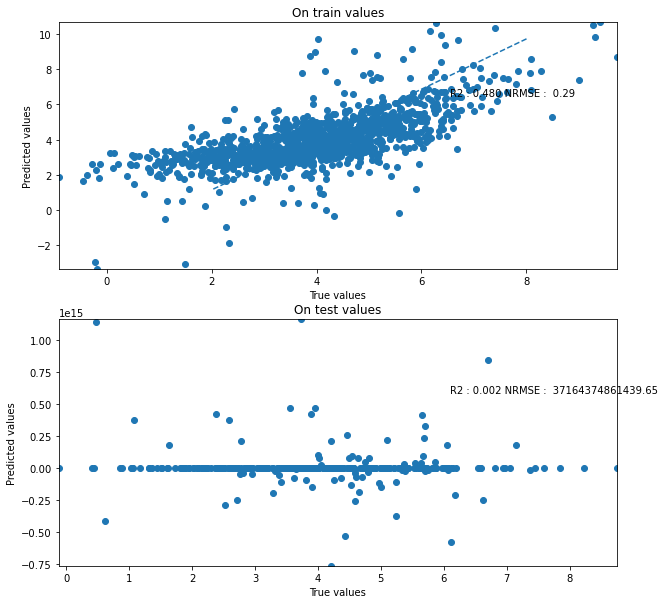

<Figure size 432x288 with 0 Axes>

In [45]:
line_reg_m = linear_model.LinearRegression()

line_reg_m.fit(xtrain,ytrain)


true_pred_plot(ytrain, line_reg_m.predict(xtrain), ytest, line_reg_m.predict(xtest))

In [37]:
#let's grid search for the k

k_grid = {'n_neighbors' : list(range(2,16))}
score = 'r2'

reg = GridSearchCV(KNeighborsRegressor(), k_grid, cv =3, scoring = score, verbose = 1)

reg.fit(xtrain, ytrain)

print('Best params on training set : {}'.format(reg.best_params_))

print('GridCV results : ')
for mean, std, k in zip(reg.cv_results_['mean_test_score'],
                       reg.cv_results_['std_test_score'],
                       reg.cv_results_['params']):
    print('{} = {:.3f} (+/- {:.3f}) for {}'.format(score,mean,std*2,k))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Best params on training set : {'n_neighbors': 8}
GridCV results : 
r2 = 0.123 (+/- 0.123) for {'n_neighbors': 2}
r2 = 0.200 (+/- 0.078) for {'n_neighbors': 3}
r2 = 0.229 (+/- 0.049) for {'n_neighbors': 4}
r2 = 0.243 (+/- 0.014) for {'n_neighbors': 5}
r2 = 0.240 (+/- 0.011) for {'n_neighbors': 6}
r2 = 0.245 (+/- 0.013) for {'n_neighbors': 7}
r2 = 0.250 (+/- 0.021) for {'n_neighbors': 8}
r2 = 0.246 (+/- 0.027) for {'n_neighbors': 9}
r2 = 0.246 (+/- 0.031) for {'n_neighbors': 10}
r2 = 0.241 (+/- 0.030) for {'n_neighbors': 11}
r2 = 0.240 (+/- 0.020) for {'n_neighbors': 12}
r2 = 0.236 (+/- 0.024) for {'n_neighbors': 13}
r2 = 0.236 (+/- 0.024) for {'n_neighbors': 14}
r2 = 0.229 (+/- 0.023) for {'n_neighbors': 15}


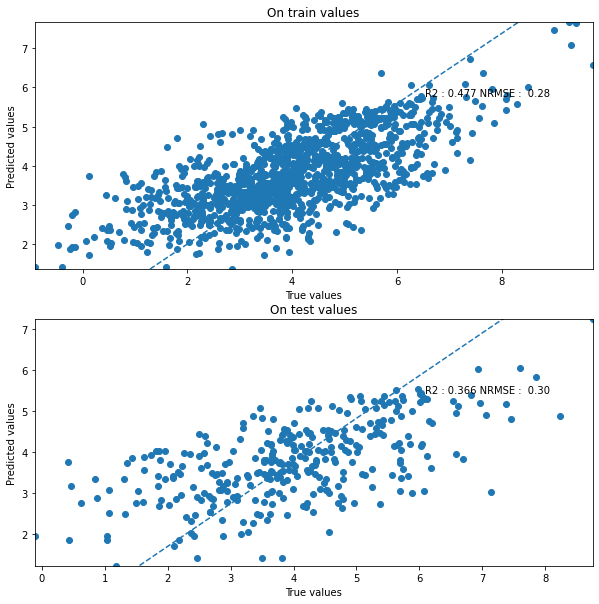

<Figure size 432x288 with 0 Axes>

In [46]:
model = KNeighborsRegressor(n_neighbors=8).fit(xtrain, ytrain)

true_pred_plot(ytrain, model.predict(xtrain), ytest, model.predict(xtest))

In [42]:
x = input('Do you want to launch ? [y/n]')
if x == 'y':

    #let's try with a svr
    C_range = [1.0, 5.0, 10.0, 100.0]
    kernels = ['linear', 'rbf', 'sigmoid', 'poly']
    degrees = [2,3,4]
    gamma_range  = np.logspace(-2, 1, 10)
    #gamma_range = np.logspace(-2, 1, 10)
    #'gamma' : gamma_range
    param_grid = {'gamma' : gamma_range, 'kernel' : kernels, 'degree' : degrees}

    score = 'neg_mean_squared_error'

    svr_cv = GridSearchCV(svm.SVR(), param_grid, cv = 3, scoring = score, verbose = 1)

    svr_cv.fit(xtrain, ytrain)

    print('Best params on training set : {}'.format(svr_cv.best_params_))

Do you want to launch ? [y/n] y


Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best params on training set : {'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}


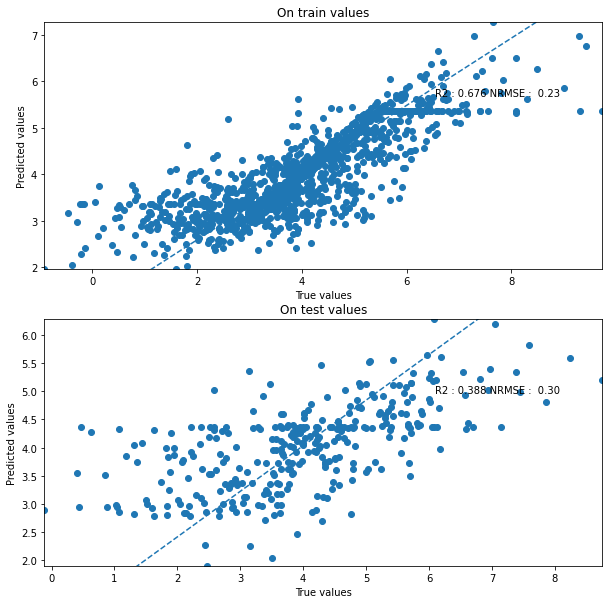

<Figure size 432x288 with 0 Axes>

In [47]:
svr = svm.SVR(kernel="rbf", C=1.0, gamma = 0.01, degree = 2)
svr = svr.fit(xtrain,ytrain)

true_pred_plot(ytrain, svr.predict(xtrain), ytest, svr.predict(xtest))

In [48]:
from sklearn import kernel_ridge
#let's try with a ridge regression

x = input('Do you want to launch ? [y/n]')
if x == 'y':
    alpha_range = [1.0, 5.0, 10.0, 100.0]
    kernels = ['linear', 'poly', 'sigmoid', 'rbf']
    degrees = [3,4,5]
    gamma_range  = np.logspace(-2, 1, 10)


    param_grid = {'gamma' : gamma_range, 'kernel' : kernels, 'degree' : degrees, 'alpha' : alpha_range}
    
    score = 'neg_mean_absolute_percentage_error'

    kernel_ridge_cv = GridSearchCV(kernel_ridge.KernelRidge(), param_grid, cv = 3, scoring = score, verbose = 1)

    kernel_ridge_cv.fit(xtrain, ytrain)

    print('Best params on training set : {}'.format(kernel_ridge_cv.best_params_))

Do you want to launch ? [y/n] y


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_mo

Best params on training set : {'alpha': 1.0, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}


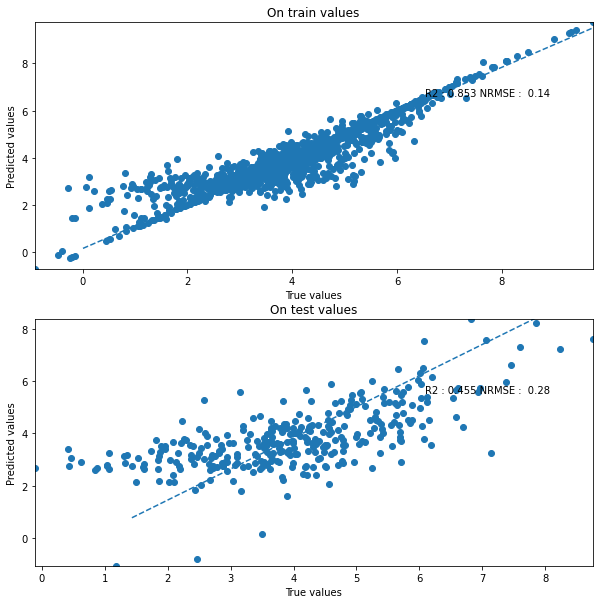

<Figure size 432x288 with 0 Axes>

In [49]:
model = kernel_ridge.KernelRidge(alpha = 1.0, kernel = 'poly', degree = 3, gamma = 0.01)
model = model.fit(xtrain, ytrain)

true_pred_plot(ytrain, model.predict(xtrain), ytest, model.predict(xtest))

## Neural network

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [52]:
#test with a single perceptron
model1 = keras.Sequential()
model1.add(keras.Input(shape = xtrain.shape[1]))
model1.add(layers.Dense(1,input_dim = 2, activation = 'linear'))

model1.compile(metrics = [tf.keras.metrics.RootMeanSquaredError()], loss = 'mean_absolute_percentage_error', optimizer = 'adam')

model1.summary()

history = model1.fit(xtrain, ytrain, epochs = 50, batch_size = 1, verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 574       
                                                                 
Total params: 574
Trainable params: 574
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1306/1306 [==============================] - 1s 884us/step - loss: 121.3337 - root_mean_squared_error: 6.2378
Epoch 2/50
1306/1306 [==============================] - 1s 881us/step - loss: 101.4881 - root_mean_squared_error: 5.7932
Epoch 3/50
1306/1306 [==============================] - 1s 890us/step - loss: 90.5161 - root_mean_squared_error: 5.5468
Epoch 4/50
1306/1306 [==============================] - 1s 892us/step - loss: 81.8732 - root_mean_squared_error: 5.2598
Epoch 5/50
1306/1306 [==============================] - 1s 908us/step - loss: 75.4021 - root_mean_square

11/11 [==============================] - 0s 800us/step


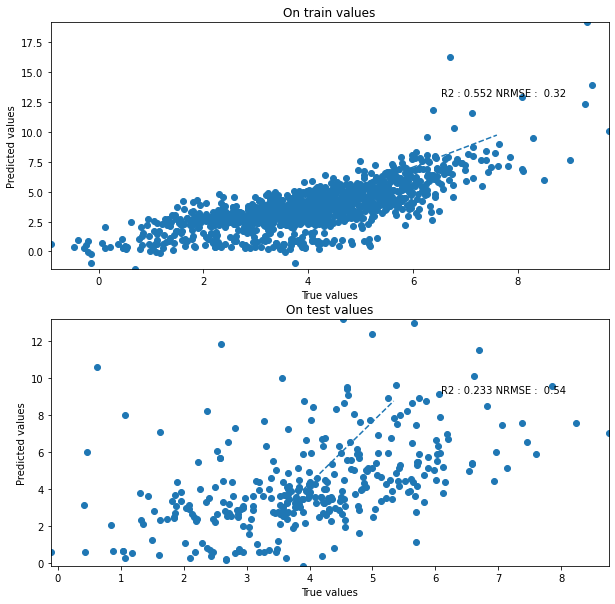

<Figure size 432x288 with 0 Axes>

In [53]:
true_pred_plot(ytrain, model1.predict(xtrain), ytest, model1.predict(xtest))

In [54]:
model2 = keras.Sequential(
    [
        layers.Dense(xtrain.shape[1], activation="relu", name="layer1", input_shape=(xtrain.shape[1],), input_dim = 2),
        layers.Dense(287, activation="relu", name="layer2"),
        layers.Dense(1, activation = 'linear', name="layer3"),
    ]
)

model2.compile(metrics = [tf.keras.metrics.RootMeanSquaredError()], loss = 'mean_absolute_percentage_error', optimizer = 'adam')

model2.summary()

history2 = model2.fit(xtrain, ytrain, epochs = 50, batch_size = 1, verbose = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 573)               328902    
                                                                 
 layer2 (Dense)              (None, 287)               164738    
                                                                 
 layer3 (Dense)              (None, 1)                 288       
                                                                 
Total params: 493,928
Trainable params: 493,928
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1306/1306 [==============================] - 3s 2ms/step - loss: 56.0389 - root_mean_squared_error: 2.2008
Epoch 2/50
1306/1306 [==============================] - 3s 2ms/step - loss: 45.0437 - root_mean_squared_error: 1.7584
Epoch 3/50
1306/1306 [==============================] - 3s 2ms/step - loss: 

11/11 [==============================] - 0s 2ms/step


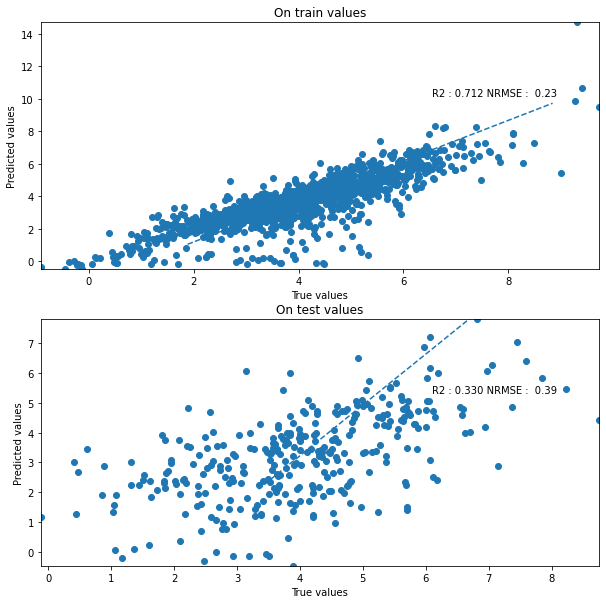

<Figure size 432x288 with 0 Axes>

In [55]:
true_pred_plot(ytrain, model2.predict(xtrain), ytest, model2.predict(xtest))

In [56]:
#now with a multi layer network

model3 = keras.Sequential(
    [
        layers.Dense(xtrain.shape[1], activation="relu", name="layer1", input_shape=(xtrain.shape[1],), input_dim = 2),
        layers.Dense(383, activation="relu", name="layer2"),
        layers.Dense(287, activation="relu", name="layer2b"),
        layers.Dense(82, activation="relu", name="layer3"),
        layers.Dense(20, activation="relu", name="layer4"),
        layers.Dense(4, activation = "relu", name = "layer5"),
        layers.Dense(1, activation = 'linear', name="layer6"),
    ]
)

model3.compile(metrics = [tf.keras.metrics.RootMeanSquaredError()], loss = 'mean_absolute_percentage_error', optimizer = 'adam')

model3.summary()

history3 = model3.fit(xtrain, ytrain, epochs = 50, batch_size = 1, verbose = 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 573)               328902    
                                                                 
 layer2 (Dense)              (None, 383)               219842    
                                                                 
 layer2b (Dense)             (None, 287)               110208    
                                                                 
 layer3 (Dense)              (None, 82)                23616     
                                                                 
 layer4 (Dense)              (None, 20)                1660      
                                                                 
 layer5 (Dense)              (None, 4)                 84        
                                                                 
 layer6 (Dense)              (None, 1)                

11/11 [==============================] - 0s 2ms/step


E:\temp\ipykernel_18952\2999706443.py:15: UserWarning: Attempting to set identical bottom == top == 2.9877731800079346 results in singular transformations; automatically expanding.
  ax[0].set_ylim(pred_train.min(),pred_train.max())
E:\temp\ipykernel_18952\2999706443.py:29: UserWarning: Attempting to set identical bottom == top == 2.9877731800079346 results in singular transformations; automatically expanding.
  ax[1].set_ylim(pred_test.min(),pred_test.max())


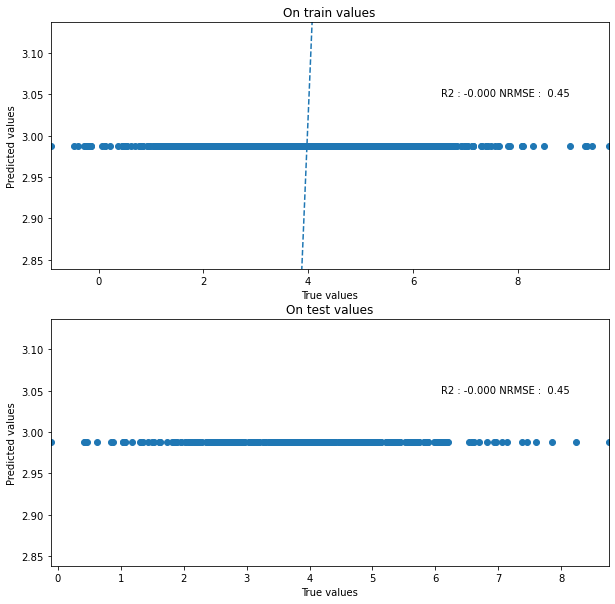

<Figure size 432x288 with 0 Axes>

In [57]:
true_pred_plot(ytrain, model3.predict(xtrain), ytest, model3.predict(xtest))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


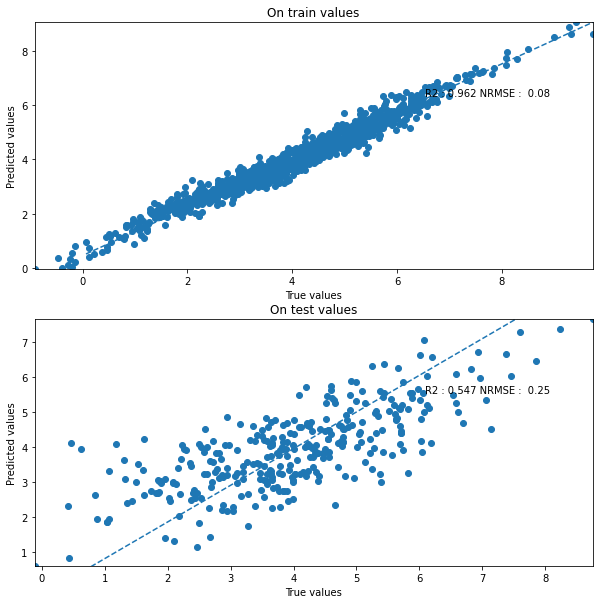

<Figure size 432x288 with 0 Axes>

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500, verbose = 1)

model = rfr.fit(xtrain,ytrain)

true_pred_plot(ytrain, model.predict(xtrain), ytest, model.predict(xtest))